In [38]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy

from scipy.stats import probplot
from scipy import stats
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [39]:
cancer_man ='위 대장 폐 간 전립선 갑상선 방광 췌장 신장 담낭'
cancer_stat = '21344 17157 15167 12189 8952 7006 2847 2807 2722 2479'
cancer_woman = '갑상선 유방 대장 위 폐 간 자궁경부 담낭 췌장 난소'
cancer_wstat = '33562 15942 10955 10293 6586 4274 3278 2514 2273 2010'

cancer_man = list(cancer_man.split(' '))
cancer_stat = list(cancer_stat.split(' '))
cancer_woman = list(cancer_woman.split(' '))
cancer_wstat = list(cancer_wstat.split(' '))

a = pd.DataFrame({'암종류_m' : cancer_man , '남자' : cancer_stat , '암종류_w' : cancer_woman ,'여자' : cancer_wstat})
a

,암종류_m,남자,암종류_w,여자
0,위,21344,갑상선,33562
1,대장,17157,유방,15942
2,폐,15167,대장,10955
3,간,12189,위,10293
4,전립선,8952,폐,6586
5,갑상선,7006,간,4274
6,방광,2847,자궁경부,3278
7,췌장,2807,담낭,2514
8,신장,2722,췌장,2273
9,담낭,2479,난소,2010


In [40]:
man_ratio = []
woman_ratio = []
a['남자'] = a['남자'].astype('int64')
a['여자'] = a['여자'].astype('int64')
a.dtypes
for i in a['남자']:
    print(i)
    print(sum(a['남자']))
    man_ratio.append(round(i/sum(a['남자']),2)*100)
for i in a['여자']:
    print(i)
    print(sum(a['여자']))
    woman_ratio.append(round(i/sum(a['여자']),2)*100)

a['남자 비율'] = pd.Series(man_ratio)
a['여자 비율'] = pd.Series(woman_ratio)
a = a[['암종류_m' , '남자' , '남자 비율' , '암종류_w' , '여자' , '여자 비율']]
a

21344
92670
17157
92670
15167
92670
12189
92670
8952
92670
7006
92670
2847
92670
2807
92670
2722
92670
2479
92670
33562
91687
15942
91687
10955
91687
10293
91687
6586
91687
4274
91687
3278
91687
2514
91687
2273
91687
2010
91687


,암종류_m,남자,남자 비율,암종류_w,여자,여자 비율
0,위,21344,23.0,갑상선,33562,37.0
1,대장,17157,19.0,유방,15942,17.0
2,폐,15167,16.0,대장,10955,12.0
3,간,12189,13.0,위,10293,11.0
4,전립선,8952,10.0,폐,6586,7.0
5,갑상선,7006,8.0,간,4274,5.0
6,방광,2847,3.0,자궁경부,3278,4.0
7,췌장,2807,3.0,담낭,2514,3.0
8,신장,2722,3.0,췌장,2273,2.0
9,담낭,2479,3.0,난소,2010,2.0


([<matplotlib.patches.Wedge at 0x1440502f8e0>,
 [Text(0.6038583403778093, 0.5247428939548947, '위'),
  Text(-0.3487075728243896, 0.7200021032295135, '대장'),
  Text(-0.7996130272289369, 0.02487984497088865, '폐'),
  Text(-0.5152882874657889, -0.6119460603685382, '간'),
  Text(0.012441520721085564, -0.7999032495009298, '전립선'),
  Text(0.4353634039106966, -0.6711622058305218, '갑상선'),
  Text(0.6353133612663752, -0.4861861094235626, '방광'),
  Text(0.714492044036022, -0.3598626390850088, '췌장'),
  Text(0.7688567720538733, -0.22104131755601367, '신장'),
  Text(0.7965194852464984, -0.07454334056542725, '담낭')],
 [Text(0.45289375528335696, 0.39355717046617106, '22.8%'),
  Text(-0.2615306796182922, 0.5400015774221351, '18.8%'),
  Text(-0.5997097704217026, 0.018659883728166484, '15.8%'),
  Text(-0.3864662155993417, -0.45895954527640354, '12.9%'),
  Text(0.009331140540814171, -0.5999274371256973, '9.9%'),
  Text(0.32652255293302246, -0.5033716543728913, '7.9%'),
  Text(0.47648502094978135, -0.36463958206767

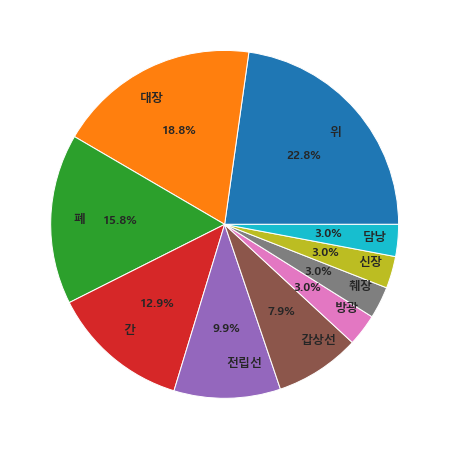

In [41]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

colors = sns.color_palette('bright')[0:5]

plt.pie(a.loc[:,'남자 비율'] , labels=a.loc[:,'암종류_m'], labeldistance=0.8, autopct='%.1f%%' ,textprops={'fontsize' : 12 , 'fontweight' : 'bold'})

([<matplotlib.patches.Wedge at 0x144055cbdc0>,
 [Text(0.3177183015092467, 0.7342037053066944, '갑상선'),
  Text(-0.7682349564823479, 0.22319285749899143, '유방'),
  Text(-0.6472135800908781, -0.47022822304275674, '대장'),
  Text(-0.1745145755738254, -0.7807334134724142, '위'),
  Text(0.2709903524050899, -0.7527046093278327, '폐'),
  Text(0.5290495071477801, -0.6000888425780728, '간'),
  Text(0.6754623508364985, -0.4286614195404469, '자궁경부'),
  Text(0.7527046204280592, -0.27099032157302505, '담낭'),
  Text(0.785829802968922, -0.14990503916088124, '췌장'),
  Text(0.798421383401051, -0.05023240515794593, '난소')],
 [Text(0.238288726131935, 0.5506527789800207, '37.0%'),
  Text(-0.5761762173617608, 0.16739464312424357, '17.0%'),
  Text(-0.48541018506815853, -0.35267116728206754, '12.0%'),
  Text(-0.13088593168036905, -0.5855500601043105, '11.0%'),
  Text(0.2032427643038174, -0.5645284569958745, '7.0%'),
  Text(0.396787130360835, -0.45006663193355456, '5.0%'),
  Text(0.5065967631273739, -0.32149606465533515,

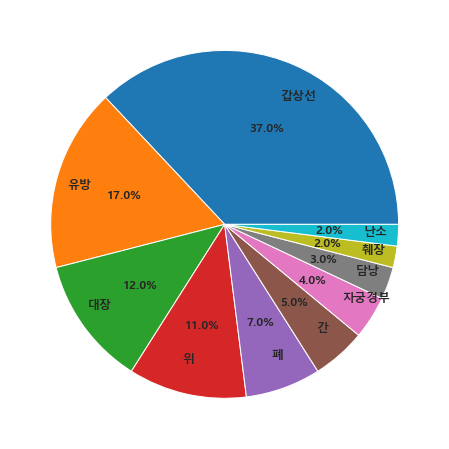

In [42]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

colors = sns.color_palette('bright')[0:5]

plt.pie(a.loc[:,'여자 비율'] , labels=a.loc[:,'암종류_w'], labeldistance=0.8, autopct='%.1f%%' ,textprops={'fontsize' : 12, 'fontweight' : 'bold'})